### Data Retrieval:

#### Fetch the top 100 news items for each category: Technology, Automobile, Science, and Hatke from the "inshorts" news platform. 
#### Extract the following information for each news item: Date, Time, Author, Title, Body,Published Source, Category.

In [1]:
# Importing Required Libraries

from bs4 import BeautifulSoup
import requests
import json
import pandas as pd

In [2]:
# Web Scraping from Inshorts News Website

Categories = ['technology',"automobile","science","hatke"]

# Creating Empty List with the required categories

Datetime =[]
Author = []
Title = []
Body=[]
Published_Source = []
Category =[]
Rank =[]

# Loop for extracting the information for each news item

for category in Categories:
    for page_no in range(1,15):
        url =f"https://inshorts.com/api/en/search/trending_topics/{category}?page={page_no}"

        source = requests.get(url).text
        content_data = json.loads(source)

        for news_content in content_data['data']['news_list']:

            #Datetime
            try:
                Datetime.append(news_content['news_obj']['created_at'])
            except:
                Datetime.append("")

            #Author
            try:
                Author.append(news_content['news_obj']['author_name'])
            except:
                Author.append("")

            #Title
            try:
                Title.append(news_content['news_obj']['title'])
            except:
                Title.append("")

            #Body
            try:
                Body.append(news_content['news_obj']['content'])
            except:
                Body.append("")

            #Published_Source
            try:
                Published_Source.append(news_content['news_obj']['source_name'])
            except:
                Published_Source.append("")

            #Category
            Category.append(category)
            
            #Rank
            try:
                Rank.append(news_content['rank'])
            except:
                Rank.append("")


# Creating dictionary and saving it in a dataframe    

dictionary = {"Datetime":Datetime, "Author":Author, "Title":Title, "Body":Body, "Published_Source":Published_Source, "Category":Category, "Rank":Rank}
fetched_df  = pd.DataFrame(dictionary)

In [3]:
# Dropping Null, Empty and Duplicates Values

fetched_df=fetched_df.dropna()
fetched_df=fetched_df[fetched_df['Datetime'] != '']
fetched_df=fetched_df.drop_duplicates()

In [4]:
fetched_df.head()

,Datetime,Author,Title,Body,Published_Source,Category,Rank
0,1702026952000,Hiral Goyal,17 apps removed from Google for spying on user...,"Google has removed 17 apps from Play Store, wh...",The Siasat Daily,technology,0
1,1702026551000,Editor InceptiveMind,Airbus’ kit converts regular A400M into firefi...,Airbus has flight-tested its A400M Roll-on/Rol...,Inceptive Mind,technology,1
3,1702024655000,Ashley Paul,RBI proposes setting up fintech repository by ...,RBI Governor Shaktikanta Das said the Monetary...,Moneycontrol,technology,3
4,1702022744000,Pratham Nagpal,Tata Opposes EV Import Tax Cut To Protect Dome...,Tata Motors is reportedly urging Indian offici...,inc42.com,technology,4
5,1702022458000,Pratham Nagpal,Why Did India's BNPL Giant ZestMoney Shut Shop?,"Founders quitting, a failed acquisition bid, r...",inc42.com,technology,5


In [5]:
# Fetching top 100 items from each category 

categories = ['technology', 'automobile', 'science', 'hatke']

# Create the final dataframe by concatenating filtered and sorted subsets
df = pd.concat([fetched_df[fetched_df['Category'] == category].sort_values(by='Rank').head(100) for category in categories])

# Resetting the index of the final dataframe
df = df.reset_index(drop=True)

In [6]:
df.head()

,Datetime,Author,Title,Body,Published_Source,Category,Rank
0,1702026952000,Hiral Goyal,17 apps removed from Google for spying on user...,"Google has removed 17 apps from Play Store, wh...",The Siasat Daily,technology,0
1,1702026551000,Editor InceptiveMind,Airbus’ kit converts regular A400M into firefi...,Airbus has flight-tested its A400M Roll-on/Rol...,Inceptive Mind,technology,1
2,1702024655000,Ashley Paul,RBI proposes setting up fintech repository by ...,RBI Governor Shaktikanta Das said the Monetary...,Moneycontrol,technology,3
3,1702022744000,Pratham Nagpal,Tata Opposes EV Import Tax Cut To Protect Dome...,Tata Motors is reportedly urging Indian offici...,inc42.com,technology,4
4,1702022458000,Pratham Nagpal,Why Did India's BNPL Giant ZestMoney Shut Shop?,"Founders quitting, a failed acquisition bid, r...",inc42.com,technology,5


In [7]:
# Convert Unix timestamp in milliseconds to datetime format

df['Datetime'] = pd.to_datetime(df['Datetime'], unit='ms')

# Creating Date and Time columns separately as required 

df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.strftime('%H:%M')

# Deleting the original Datetime column

del df["Datetime"]

# Rearranging the dataframe in a required order

df = df[['Date', 'Time', 'Author', 'Title', 'Body', 'Published_Source', 'Category']]

In [8]:
# Displaying Dataframe
print(df.shape)
df.head()

(400, 7)


,Date,Time,Author,Title,Body,Published_Source,Category
0,2023-12-08,09:15,Hiral Goyal,17 apps removed from Google for spying on user...,"Google has removed 17 apps from Play Store, wh...",The Siasat Daily,technology
1,2023-12-08,09:09,Editor InceptiveMind,Airbus’ kit converts regular A400M into firefi...,Airbus has flight-tested its A400M Roll-on/Rol...,Inceptive Mind,technology
2,2023-12-08,08:37,Ashley Paul,RBI proposes setting up fintech repository by ...,RBI Governor Shaktikanta Das said the Monetary...,Moneycontrol,technology
3,2023-12-08,08:05,Pratham Nagpal,Tata Opposes EV Import Tax Cut To Protect Dome...,Tata Motors is reportedly urging Indian offici...,inc42.com,technology
4,2023-12-08,08:00,Pratham Nagpal,Why Did India's BNPL Giant ZestMoney Shut Shop?,"Founders quitting, a failed acquisition bid, r...",inc42.com,technology


### Data Storage:

#### Design a relational database schema to store the extracted information.
#### Pipeline the data into the designed database.

In [9]:
# Importing Required Libraries

import sqlite3
import pandas as pd

In [10]:
# Connect to SQLite database

conn = sqlite3.connect('news_database.db')

# Create a cursor object to execute SQL queries

cursor = conn.cursor()

In [11]:
# Drop Table If exists

cursor.execute('''DROP TABLE IF EXISTS News_Items''')

In [12]:
# Create a table in the database

cursor.execute('''
    CREATE TABLE IF NOT EXISTS News_Items (
        S_No INTEGER PRIMARY KEY,
        Date Date,
        Time Time,
        Author TEXT,
        Title TEXT,
        Body TEXT,
        Published_Source TEXT,
        Category TEXT
    )
''')

In [13]:
# Pipeline the data into the database

for index, row in df.iterrows():
    cursor.execute('''
        INSERT INTO News_Items (Date, Time, Author, Title, Body, Published_Source, Category)
        VALUES (?, ?, ?, ?, ?, ?, ?)
    ''', (row['Date'], row['Time'], row['Author'], row['Title'], row['Body'], row['Published_Source'], row['Category']))


In [14]:
# Commit the changes
conn.commit()

In [15]:
# Execute a SELECT query to fetch all rows from the News Items table
cursor.execute('''select * from News_Items''')

# Fetch all rows from the result set
rows = cursor.fetchall()

# Get column names from the cursor description
columns = [description[0] for description in cursor.description]
# print(columns)


# Display results
# for row in rows:
#     print(row)    
    
# Close the connection    
conn.close()

# 

### Keyword Analysis:

#### Create a word cloud visualization based on the frequency of the following keywords in the fetched articles: "Diwali", "Offer", "Discount", "Dhamaka", "Dead", "Fire", "Burn".

In [16]:
df.head()

,Date,Time,Author,Title,Body,Published_Source,Category
0,2023-12-08,09:15,Hiral Goyal,17 apps removed from Google for spying on user...,"Google has removed 17 apps from Play Store, wh...",The Siasat Daily,technology
1,2023-12-08,09:09,Editor InceptiveMind,Airbus’ kit converts regular A400M into firefi...,Airbus has flight-tested its A400M Roll-on/Rol...,Inceptive Mind,technology
2,2023-12-08,08:37,Ashley Paul,RBI proposes setting up fintech repository by ...,RBI Governor Shaktikanta Das said the Monetary...,Moneycontrol,technology
3,2023-12-08,08:05,Pratham Nagpal,Tata Opposes EV Import Tax Cut To Protect Dome...,Tata Motors is reportedly urging Indian offici...,inc42.com,technology
4,2023-12-08,08:00,Pratham Nagpal,Why Did India's BNPL Giant ZestMoney Shut Shop?,"Founders quitting, a failed acquisition bid, r...",inc42.com,technology


In [17]:
# Importing Required Libraries

from wordcloud import WordCloud
import matplotlib.pyplot as plt

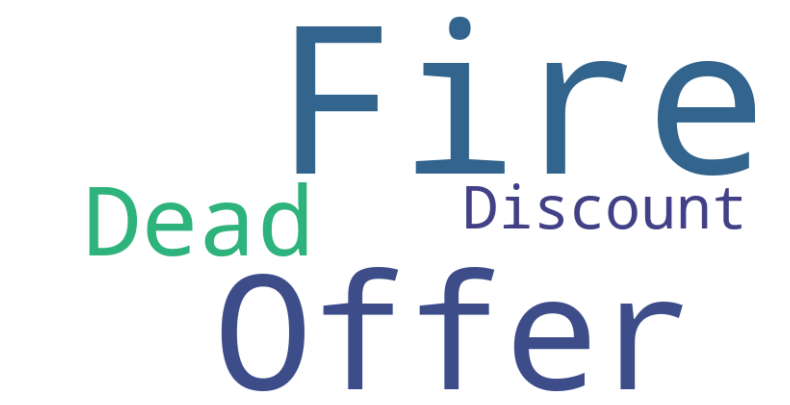

In [18]:
# Keywords for analysis
keywords = ["Diwali", "Offer", "Discount", "Dhamaka", "Dead", "Fire", "Burn"]

# Combine relevant text fields (Title, Body) into a single column for analysis
df['Text'] = df['Title'] + ' ' + df['Body']

# Concatenate the text from all rows
all_text = ' '.join(df['Text'])

# Generate word cloud based on the frequency of specified keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({keyword: all_text.lower().count(keyword.lower()) for keyword in keywords})

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()